# Urban DataMart Exploration for Chicago, IL

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Load Source Tables

The `ID_TREE` table contains information about individual trees.

In [4]:
df_id_tree = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/ID_TREE.csv')
print('Records:', len(df_id_tree))
print('Columns:', list(df_id_tree.columns))
df_id_tree[:1]

Records: 2138
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN


The `REF_PLANT_DICTIONARY` table contains information about plant species as defined by the Natural Resources Conservation Service (NRCS) for the PLANTS database (see also https://plants.usda.gov).

In [5]:
df_ref_plant_dictionary = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_PLANT_DICTIONARY.csv', low_memory=False)
print('Records:', len(df_ref_plant_dictionary))
print('Columns:', list(df_ref_plant_dictionary.columns))
df_ref_plant_dictionary[:1]

Records: 81489
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
0,503517201126144,Old,NOFR3,Nothoscordum fragrans,NOBO,Nothoscordum borbonicum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nothoscordum fragrans auct. non (Vent.) Kunth,auct. non (Vent.) Kunth,NaN,NaN,NaN,Nothoscordum,NaN,fragrans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0


The `REF_SPECIES` table contains a reference of species codes in the `SPCD` column.

In [6]:
df_ref_species = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_SPECIES.csv')
print('Records:', len(df_ref_species))
print('Columns:', list(df_ref_species.columns))
df_ref_species[:1]

Records: 2697
Columns: ['SPCD', 'COMMON_NAME', 'SHARED_COMMON_NAME_IND', 'GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'SCIENTIFIC_NAME', 'SPECIES_SYMBOL', 'E_SPGRPCD', 'W_SPGRPCD', 'C_SPGRPCD', 'P_SPGRPCD', 'MAJOR_SPGRPCD', 'STOCKING_SPGRPCD', 'FOREST_TYPE_SPGRPCD', 'JENKINS_SPGRPCD', 'JENKINS_SAPLING_ADJUSTMENT', 'SITETREE', 'SFTWD_HRDWD', 'WOODLAND', 'WOOD_SPGR_GREENVOL_DRYWT', 'WOOD_SPGR_GREENVOL_DRYWT_CIT', 'BARK_SPGR_GREENVOL_DRYWT', 'BARK_SPGR_GREENVOL_DRYWT_CIT', 'MC_PCT_GREEN_WOOD', 'MC_PCT_GREEN_WOOD_CIT', 'MC_PCT_GREEN_BARK', 'MC_PCT_GREEN_BARK_CIT', 'BARK_VOL_PCT', 'BARK_VOL_PCT_CIT', 'CWD_DECAY_RATIO1', 'CWD_DECAY_RATIO2', 'CWD_DECAY_RATIO3', 'CWD_DECAY_RATIO4', 'CWD_DECAY_RATIO5', 'DWM_CARBON_RATIO', 'CARBON_RATIO_LIVE', 'DRYWT_TO_GREENWT_CONVERSION', 'CREATED_DATE', 'MODIFIED_DATE']


,SPCD,COMMON_NAME,SHARED_COMMON_NAME_IND,GENUS,SPECIES,VARIETY,SUBSPECIES,SCIENTIFIC_NAME,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,P_SPGRPCD,MAJOR_SPGRPCD,STOCKING_SPGRPCD,FOREST_TYPE_SPGRPCD,JENKINS_SPGRPCD,JENKINS_SAPLING_ADJUSTMENT,SITETREE,SFTWD_HRDWD,WOODLAND,WOOD_SPGR_GREENVOL_DRYWT,WOOD_SPGR_GREENVOL_DRYWT_CIT,BARK_SPGR_GREENVOL_DRYWT,BARK_SPGR_GREENVOL_DRYWT_CIT,MC_PCT_GREEN_WOOD,MC_PCT_GREEN_WOOD_CIT,MC_PCT_GREEN_BARK,MC_PCT_GREEN_BARK_CIT,BARK_VOL_PCT,BARK_VOL_PCT_CIT,CWD_DECAY_RATIO1,CWD_DECAY_RATIO2,CWD_DECAY_RATIO3,CWD_DECAY_RATIO4,CWD_DECAY_RATIO5,DWM_CARBON_RATIO,CARBON_RATIO_LIVE,DRYWT_TO_GREENWT_CONVERSION,CREATED_DATE,MODIFIED_DATE
0,6012,spineless wattle,N,Acacia,muricata,NaN,NaN,Acacia muricata,ACMU,54.0,54.0,54.0,NaN,3,37.0,227.0,8,0.84031,NaN,H,N,0.52,26.0,0.53,26.0,75.13,26.0,80.49,26.0,15.16,26.0,1.0,0.78,0.45,0.42,0.42,0.491,0.475,1.758474,2021-09-03 22:38:53,NaN


The `REF_TREE_STATUS` table stores reference data for the `STATUSCD` attribute in the `ID_MOTHER_TREE` and `ID_TREE` tables. Code for this attribute indicates the status of a tree at the time of measurement.

In [7]:
TREE_STATUS_LIVE = 1
TREE_STATUS_DEAD = 2

df_ref_tree_status = pd.read_csv('./data/Urban DataMart/Chicago_IL_CSV/REF_TREE_STATUS.csv')
print('Records:', len(df_ref_tree_status))
print('Columns:', list(df_ref_tree_status.columns))
df_ref_tree_status

Records: 5
Columns: ['VALUE', 'ABBR', 'MEANING', 'RETIRED']


,VALUE,ABBR,MEANING,RETIRED
0,0,No Status,No status – tree is not presently in the sample (remeasurement plots only).,N
1,1,Live,Live tree,N
2,2,Dead,Dead tree,N
3,3,Cut & Utilized,"Cut & Utilized – Collected on remeasurement trees only. A tree that occupied a forested condition in the previous inventory only. A tree that has been cut and removed by direct human activity related to harvesting, silviculture or land clearing. The tree is assumed to have been utilized for a commercial purposes, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N
4,4,Removed,"Removed – Collected on remeasurement trees only. A tree that has been removed by direct human activity but not likely utilized for a commercial product, such as timber, chips, or firewood, and noncommercial purposes such as domestic firewood, landscaping, and fence posts.",N


## Data Filtering Methodology

<div style="display:none;">
```mermaid
graph LR
    df_id_tree --> df_id_tree_with_species
    df_ref_species -->|merge on SPCD, brings<br/>genus, species, variety, subspecies, common name| df_id_tree_with_species
    df_id_tree_with_species -->|filter to just trees that<br/>are alive and are<br/>individual trees| df_trees
    df_ref_plant_dictionary -->|filter to just current, species<br/>level records for Illinois| df_ref_plant_dictionary_illinois
    df_ref_plant_dictionary_illinois -->|determine nativity| df_ref_plant_dictionary_illinois_nativity
    df_trees --> df_trees_illinois
    df_ref_plant_dictionary_illinois_nativity -->|merge on genus, species,<br/>variety, and subspecies| df_trees_illinois
    df_trees_illinois -->|manual inspection of<br/>nativity information for<br/>Chicago| df_trees_chicago
    style df_id_tree fill:LightBlue,stroke:SteelBlue
    style df_ref_species fill:LightBlue,stroke:SteelBlue
    style df_ref_plant_dictionary fill:LightBlue,stroke:SteelBlue
    style df_trees_chicago fill:PaleGreen,stroke:SeaGreen
```
</div>

![Filtering Methodology Diagram](./filtering_methodology_diagram.png)

## Open Questions

* Why are some trees in `df_trees` not present in `df_ref_plant_dictionary_illinois`?

In [55]:
dfr = df_ref_plant_dictionary
dft = df_trees

dfa = dft[
    (dft['GENUS'] == 'Prunus')
    &(dft['SPECIES'] == 'salicina')
]

dfb = dfr[
    (dfr['GENUS'] == 'Prunus')
    &(dfr['SPECIES'] == 'salicina')
    #&(dfr['GROWTH_HABIT'].str.contains('Tree'))
]

#dfa.merge(dfb, on=['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES'], how='left')
dfb

# Notice how the GROWHT_HABITAT and STATE_DISTRIBUTION is missing.

,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
5434,503529682126144,Species,PRSA3,Prunus salicina,NaN,NaN,Japanese plum,Dicot,Rosaceae,NaN,NaN,NaN,NaN,NaN,Prunus salicina Lindl.,Lindl.,NaN,NaN,NaN,Prunus,NaN,salicina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 13:01:15,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0
5435,503529683126144,Species,PRSAM,Prunus salicina var. mandshurica,NaN,NaN,NaN,Dicot,Rosaceae,NaN,NaN,NaN,NaN,NaN,Prunus salicina Lindl. var. mandshurica (Skvortsov) Skvortsov & A.I. Baranov,Lindl.,(Skvortsov) Skvortsov & A.I. Baranov,NaN,NaN,Prunus,NaN,salicina,NaN,NaN,NaN,var.,NaN,mandshurica,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 13:01:15,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0


* Why is Robinia pseudoacacia native by my calculations while it appear non-native in other sources (e.g. [https://en.wikipedia.org/wiki/Robinia_pseudoacacia](https://en.wikipedia.org/wiki/Robinia_pseudoacacia))

In [56]:
dfr = df_ref_plant_dictionary
dft = df_trees

dfa = dft[
    (dft['GENUS'] == 'Robinia')
    &(dft['SPECIES'] == 'pseudoacacia')
]

dfb = dfr[
    (dfr['GENUS'] == 'Robinia')
    &(dfr['SPECIES'] == 'pseudoacacia')
    #&(dfr['GROWTH_HABIT'].str.contains('Tree'))
]

dfb

# Notice how it's native in the lower 48, but it's *in* Illinois.
# Maybe my method to determine nativity isn't quite right?
# Maybe I can supplement it with world checklist of vascular plants?

,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
13683,503533144126144,Species,ROPS,Robinia pseudoacacia,NaN,NaN,black locust,Dicot,Fabaceae,Tree,Perennial,L48(N)CAN(I),"AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY","CAN(BC, NB, NS, ON, PE, QC), USA(AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY)",Robinia pseudoacacia L.,L.,NaN,NaN,NaN,Robinia,NaN,pseudoacacia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 13:01:42,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0
13684,503533145126144,Old,ROPSI2,Robinia pseudoacacia f. inermis,ROPS,Robinia pseudoacacia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robinia pseudoacacia L. f. inermis (Mirb.) Rehder,L.,(Mirb.) Rehder,NaN,NaN,Robinia,NaN,pseudoacacia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f.,inermis,NaN,ERICHDODSON,2018-02-09 13:01:42,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0
13685,503533146126144,Old,ROPSP,Robinia pseudoacacia var. pyramidalis,ROPS,Robinia pseudoacacia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robinia pseudoacacia L. var. pyramidalis Pepin,L.,Pepin,NaN,NaN,Robinia,NaN,pseudoacacia,NaN,NaN,NaN,var.,NaN,pyramidalis,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 13:01:42,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0
13686,503533147126144,Old,ROPSR,Robinia pseudoacacia var. rectissima,ROPS,Robinia pseudoacacia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robinia pseudoacacia L. var. rectissima (L.) Raber,L.,(L.) Raber,NaN,NaN,Robinia,NaN,pseudoacacia,NaN,NaN,NaN,var.,NaN,rectissima,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 13:01:42,126144,ERICHDODSON,2018-02-12 11:12:27,126144.0


## Data Filtering

In [8]:
df_id_tree_with_species = pd.merge(
    df_id_tree,
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES']],
    on='SPCD',
    how='left',
)
print('Records:', len(df_id_tree_with_species))
print('Columns:', list(df_id_tree_with_species.columns))
df_id_tree_with_species[:1]

Records: 2138
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN


In [9]:
df_trees = df_id_tree_with_species[
    (df_id_tree_with_species['STATUSCD'] == TREE_STATUS_LIVE)  # Living.
    &(df_id_tree_with_species['TREE'] == df_id_tree_with_species['STEM'])  # Individual trees.
]
print('Records:', len(df_trees))
print('Columns:', list(df_trees.columns))
df_trees[:1]

Records: 1740
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN


In [10]:
df_ref_plant_dictionary_illinois = df_ref_plant_dictionary[
    (df_ref_plant_dictionary['SYMBOL_TYPE'] == 'Species')  # Identifies a species and is not old.
    &(df_ref_plant_dictionary['STATE_DISTRIBUTION'].str.contains('IL', na=False, regex=False))  # Found in Illinois.
]
print('Records:', len(df_ref_plant_dictionary_illinois))
print('Columns:', list(df_ref_plant_dictionary_illinois.columns))
df_ref_plant_dictionary_illinois[:1]

Records: 4170
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE
17,503517222126144,Species,NULU,Nuphar lutea,NaN,NaN,yellow pond-lily,Dicot,Nymphaeaceae,Forb/herb,Perennial,L48(N)AK(N)CAN(N)SPM(N),"AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY","CAN(AB, BC, LB, MB, NB, NF, NS, NT, NU, ON, PE, QC, SK, YT), FRA(SB), USA(AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY)",Nuphar lutea (L.) Sm.,(L.) Sm.,NaN,NaN,NaN,Nuphar,NaN,lutea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0


In [37]:
df_ref_plant_dictionary_illinois_nativity = df_ref_plant_dictionary_illinois.copy()
df_ref_plant_dictionary_illinois_nativity['NATIVITY'] = (
    (
        (df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('L48(N', na=False, regex=False))  # Native or pobably native in lower 48.
        &(~df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('IL(I', na=False, regex=False))  # Not invasive in Illinois.
    )
    |(df_ref_plant_dictionary_illinois['US_NATIVITY'].str.contains('IL(N', na=False, regex=False))  # Native or probably native in Illinois.
).map({True: 'native', False: 'non-native'})
df_ref_plant_dictionary_illinois_nativity['NATIVITY'] = df_ref_plant_dictionary_illinois_nativity['NATIVITY'].fillna('non-native')
print('Records:', len(df_ref_plant_dictionary_illinois_nativity))
print('Columns:', list(df_ref_plant_dictionary_illinois_nativity.columns))
df_ref_plant_dictionary_illinois_nativity[:1]

Records: 4170
Columns: ['CN', 'SYMBOL_TYPE', 'SYMBOL', 'SCIENTIFIC_NAME', 'NEW_SYMBOL', 'NEW_SCIENTIFIC_NAME', 'COMMON_NAME', 'CATEGORY', 'FAMILY', 'GROWTH_HABIT', 'DURATION', 'US_NATIVITY', 'STATE_DISTRIBUTION', 'STATE_AND_PROVINCE', 'SCIENTIFIC_NAME_W_AUTHOR', 'GENERA_BINOMIAL_AUTHOR', 'TRINOMIAL_AUTHOR', 'QUADRINOMIAL_AUTHOR', 'XGENUS', 'GENUS', 'XSPECIES', 'SPECIES', 'SSP', 'XSUBSPECIES', 'SUBSPECIES', 'VAR', 'XVARIETY', 'VARIETY', 'SUBVAR', 'SUBVARIETY', 'F', 'FORMA', 'NOTES', 'CREATED_BY', 'CREATED_DATE', 'CREATED_IN_INSTANCE', 'MODIFIED_BY', 'MODIFIED_DATE', 'MODIFIED_IN_INSTANCE', 'NATIVITY']


,CN,SYMBOL_TYPE,SYMBOL,SCIENTIFIC_NAME,NEW_SYMBOL,NEW_SCIENTIFIC_NAME,COMMON_NAME,CATEGORY,FAMILY,GROWTH_HABIT,DURATION,US_NATIVITY,STATE_DISTRIBUTION,STATE_AND_PROVINCE,SCIENTIFIC_NAME_W_AUTHOR,GENERA_BINOMIAL_AUTHOR,TRINOMIAL_AUTHOR,QUADRINOMIAL_AUTHOR,XGENUS,GENUS,XSPECIES,SPECIES,SSP,XSUBSPECIES,SUBSPECIES,VAR,XVARIETY,VARIETY,SUBVAR,SUBVARIETY,F,FORMA,NOTES,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,NATIVITY
17,503517222126144,Species,NULU,Nuphar lutea,NaN,NaN,yellow pond-lily,Dicot,Nymphaeaceae,Forb/herb,Perennial,L48(N)AK(N)CAN(N)SPM(N),"AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY","CAN(AB, BC, LB, MB, NB, NF, NS, NT, NU, ON, PE, QC, SK, YT), FRA(SB), USA(AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY)",Nuphar lutea (L.) Sm.,(L.) Sm.,NaN,NaN,NaN,Nuphar,NaN,lutea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERICHDODSON,2018-02-09 12:59:36,126144,ERICHDODSON,2018-02-12 11:12:26,126144.0,native


In [47]:
df_trees_illinois = df_trees.merge(
    df_ref_plant_dictionary_illinois_nativity[['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'NATIVITY']],
    on=['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES'],
    how="left",
)
df_trees_illinois['NATIVITY'] = df_trees_illinois['NATIVITY'].fillna('non-native')
print('Records:', len(df_trees_illinois))
print('Columns:', list(df_trees_illinois.columns))
df_trees_illinois[:1]

Records: 1740
Columns: ['PLOTID', 'VISIT_NBR', 'STATECD', 'UNITCD', 'COUNTYCD', 'RETIRED_PLOT', 'SUBP', 'CONDID', 'TREE', 'STEM', 'MOTHER_TREE', 'OFFSET_POINT', 'DIST', 'AZIMUTH', 'STATUSCD', 'TREECLCD', 'SPCD', 'SPGRPCD', 'STANDING_DEAD_CD', 'UTILCLCD', 'MORTYR', 'DIA', 'DIACHECK', 'DIAHTCD', 'LTDMP', 'TOTAL_LENGTH', 'ACTUAL_LENGTH', 'HTCD', 'ABNORMAL_STEM_TERMINATION', 'RECONCILECD', 'BOLE_STUMP_REMOVED', 'FIELD_PREV_DIA', 'FIELD_PREV_STATUS_CD', 'FIELD_PREV_NBR_STEMS', 'CROWN_CLASS_CD', 'COMP_CROWN_RATIO', 'DMG_ROOT_STEM_GIRDLING', 'DMG_TRUNK_BARK_INCLUSION', 'DMG_TOPPING_PRUNING', 'DMG_EXCESS_MULCH', 'DMG_SIDEWALK_ROOT_CONFLICT', 'DMG_OVERHEAD_WIRES', 'DMG_IMPROPER_PLANTING', 'DAMAGE_AGENT_1', 'DAMAGE_AGENT_2', 'DAMAGE_AGENT_3', 'NBR_STEMS', 'CULL_FLD', 'ROUGHCULL', 'CAUSE_OF_DEATH', 'DECAYCD', 'MORTALITY_CD', 'TREECLCD_NRS', 'TREECLCD_SRS', 'TREECLCD_PNWRS', 'TREECLCD_RMRS', 'TREE_GRADE', 'TREE_SITE_INDEX', 'BASAL_AREA', 'TPA_UNADJ', 'CARBON_AG', 'CARBON_BG', 'DRYBIO_AG', 'DRYBIO_

,PLOTID,VISIT_NBR,STATECD,UNITCD,COUNTYCD,RETIRED_PLOT,SUBP,CONDID,TREE,STEM,MOTHER_TREE,OFFSET_POINT,DIST,AZIMUTH,STATUSCD,TREECLCD,SPCD,SPGRPCD,STANDING_DEAD_CD,UTILCLCD,MORTYR,DIA,DIACHECK,DIAHTCD,LTDMP,TOTAL_LENGTH,ACTUAL_LENGTH,HTCD,ABNORMAL_STEM_TERMINATION,RECONCILECD,BOLE_STUMP_REMOVED,FIELD_PREV_DIA,FIELD_PREV_STATUS_CD,FIELD_PREV_NBR_STEMS,CROWN_CLASS_CD,COMP_CROWN_RATIO,DMG_ROOT_STEM_GIRDLING,DMG_TRUNK_BARK_INCLUSION,DMG_TOPPING_PRUNING,DMG_EXCESS_MULCH,DMG_SIDEWALK_ROOT_CONFLICT,DMG_OVERHEAD_WIRES,DMG_IMPROPER_PLANTING,DAMAGE_AGENT_1,DAMAGE_AGENT_2,DAMAGE_AGENT_3,NBR_STEMS,CULL_FLD,ROUGHCULL,CAUSE_OF_DEATH,DECAYCD,MORTALITY_CD,TREECLCD_NRS,TREECLCD_SRS,TREECLCD_PNWRS,TREECLCD_RMRS,TREE_GRADE,TREE_SITE_INDEX,BASAL_AREA,TPA_UNADJ,CARBON_AG,CARBON_BG,DRYBIO_AG,DRYBIO_BG,DRYBIO_BOLE,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG,DRYBIO_SAWLOG_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP,DRYBIO_STUMP_BARK,VOLBFGRS,VOLBFNET,VOLBSGRS,VOLBSNET,VOLCFGRS,VOLCFGRS_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFNET,VOLCFNET_BARK,VOLCFSND,VOLCFSND_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCSGRS,VOLCSGRS_BARK,VOLCSNET,VOLCSNET_BARK,VOLCSSND,VOLCSSND_BARK,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,CN,PLT_CN,SBP_CN,CND_CN,MTRE_CN,PREV_PLT_CN,PREV_TRE_CN,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES,NATIVITY
0,1915119,4,18,4,127,20096,1,1,20,20,NaN,NaN,NaN,NaN,1,2.0,972,41,NaN,NaN,NaN,7.7,0.0,1,NaN,55.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,73.0,0.323368,6.018046,139.025654,25.581387,291.458395,53.629742,170.099862,22.310469,63.234442,6.246563,NaN,NaN,201.760803,26.46315,14.343245,1.881274,NaN,NaN,NaN,NaN,5.86057,0.973352,0.494178,0.082076,0.596659,0.099096,5.743359,0.963619,5.801965,0.973352,0.489236,0.082076,0.590692,0.099096,NaN,NaN,NaN,NaN,NaN,NaN,6.951407,1.154524,6.881893,1.154524,942084333290487,352769580489998,942084252290487,942084249290487,942084292290487,NaN,NaN,American elm,Ulmus,americana,NaN,NaN,native


In [48]:
df_trees_chicago = df_trees_illinois.copy()

## Questions and Answers

Which tree species are are represented in the tree dataset for Chicago?

In [49]:
df_trees_chicago[['GENUS', 'SPECIES', 'VARIETY', 'SUBSPECIES', 'COMMON_NAME', 'NATIVITY']].value_counts(dropna=False)

GENUS         SPECIES        VARIETY  SUBSPECIES  COMMON_NAME               NATIVITY  
Rhamnus       cathartica     NaN      NaN         common buckthorn          non-native    207
Acer          saccharinum    NaN      NaN         silver maple              native        153
Morus         alba           NaN      NaN         white mulberry            non-native    119
Populus       deltoides      NaN      NaN         eastern cottonwood        native        103
Acer          negundo        NaN      NaN         boxelder                  native         87
Prunus        serotina       NaN      NaN         black cherry              native         86
Ulmus         americana      NaN      NaN         American elm              native         71
Acer          platanoides    NaN      NaN         Norway maple              non-native     71
Tilia         americana      NaN      NaN         American basswood         native         51
Quercus       macrocarpa     NaN      NaN         bur oak          

## Questions and Answers (OLD)

Which species are represented in the `ID_TREE` table?

In [6]:
df = pd.merge(
    df_id_tree[['SPCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)
df.value_counts()

SPCD  COMMON_NAME               GENUS         SPECIES      
6918  common buckthorn          Rhamnus       cathartica       274
317   silver maple              Acer          saccharinum      181
681   white mulberry            Morus         alba             147
742   eastern cottonwood        Populus       deltoides        127
762   black cherry              Prunus        serotina         122
313   boxelder                  Acer          negundo          105
544   green ash                 Fraxinus      pennsylvanica     81
972   American elm              Ulmus         americana         78
320   Norway maple              Acer          platanoides       75
951   American basswood         Tilia         americana         53
552   honeylocust               Gleditsia     triacanthos       45
823   bur oak                   Quercus       macrocarpa        45
974   Siberian elm              Ulmus         pumila            45
837   black oak                 Quercus       velutina          40
93

What distribution of tree in `ID_TREE` are living, dead, or in another status?

In [7]:
df_id_tree_live = df_id_tree[df_id_tree['STATUSCD'] == TREE_STATUS_LIVE]
df_id_tree_dead = df_id_tree[df_id_tree['STATUSCD'] == TREE_STATUS_DEAD]

df = pd.merge(
    df_id_tree[['STATUSCD']],
    df_ref_tree_status[['VALUE', 'ABBR']],
    left_on='STATUSCD',
    right_on='VALUE',
    how='left',
)
df = df.drop('VALUE', axis=1)
df.value_counts()

STATUSCD  ABBR          
1         Live              1863
2         Dead               217
0         No Status           31
3         Cut & Utilized      23
4         Removed              4
Name: count, dtype: int64

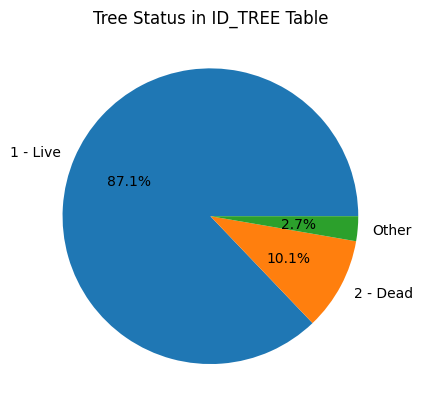

In [8]:
df_labeled = df['STATUSCD'].astype('str') + ' - ' + df['ABBR']
df_labeled_counts = df_labeled.value_counts()

threshold = 35  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Tree Status in ID_TREE Table',
    autopct='%1.1f%%',
)
ax.set_ylabel('')
pass

Which species of trees are living or dead in the `ID_TREE` table?

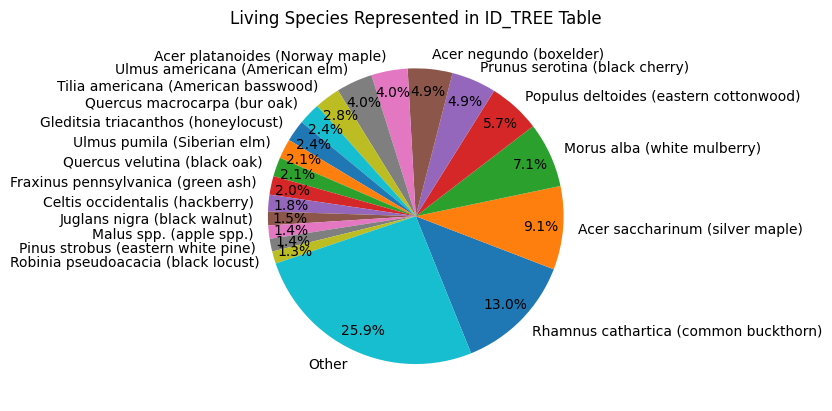

In [9]:
df = pd.merge(
    df_id_tree_live[['SPCD', 'STATUSCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 24  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=-68,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

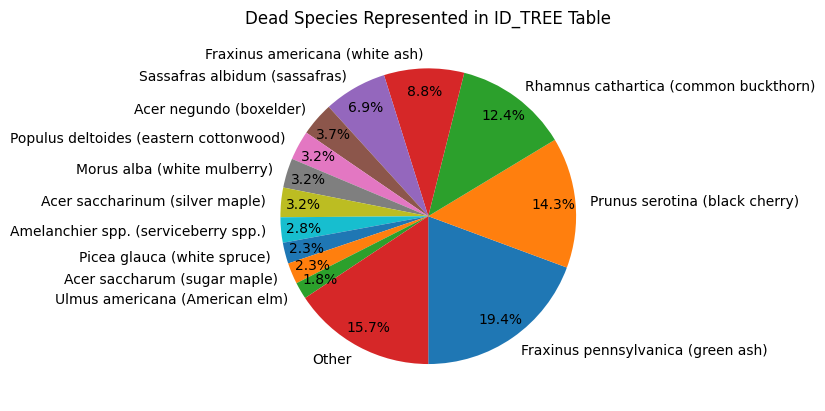

In [10]:
df = pd.merge(
    df_id_tree_dead[['SPCD', 'STATUSCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 4  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Dead Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=-90,  # Determined by fiddling
)
ax.set_ylabel('')
pass

Which species of trees are native to Illinois?

In [11]:
df_native = df_ref_plant_dictionary[(
    (
        (
            df_ref_plant_dictionary['US_NATIVITY'].str.contains('L48(N', na=False, regex=False)  # Native or pobably native in lower 48.
            & ~df_ref_plant_dictionary['US_NATIVITY'].str.contains('IL(I', na=False, regex=False)  # Not invasive in Illinois.
        )
        | df_ref_plant_dictionary['US_NATIVITY'].str.contains('IL(N', na=False, regex=False)  # Native or probably native in Illinois.
    )
    & df_ref_plant_dictionary['STATE_DISTRIBUTION'].str.contains('IL', na=False)  # Is in Illinois.
    & (df_ref_plant_dictionary['SYMBOL_TYPE'] == 'Species')  # Identifies a species (as opposed to a genus).
    & (df_ref_plant_dictionary['VAR'].isna())  # Is not a variety.
    & (df_ref_plant_dictionary['SSP'].isna())  # Is not a subspecies.
    & (df_ref_plant_dictionary['GROWTH_HABIT'].str.contains('Tree'))  # Is a tree.
)]
df_native[['GENUS', 'SPECIES', 'COMMON_NAME']].sort_values(by=['GENUS', 'SPECIES'])

,GENUS,SPECIES,COMMON_NAME
28025,Acer,floridanum,southern sugar maple
28055,Acer,negundo,boxelder
28421,Acer,nigrum,black maple
25821,Acer,rubrum,red maple
25235,Acer,saccharinum,silver maple
22192,Acer,saccharum,sugar maple
28281,Aesculus,flava,yellow buckeye
28283,Aesculus,glabra,Ohio buckeye
25243,Aesculus,marylandica,buckeye
31542,Aesculus,pavia,red buckeye


Which living trees in `ID_TREES` are native and non-native?

In [12]:
df_trees_nativity = pd.merge(
    df_id_tree_live[['SPCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)
df_trees_nativity = pd.merge(
    df_trees_nativity,
    df_native[['CN', 'GENUS', 'SPECIES']],
    on=['GENUS', 'SPECIES'],
    how='left',
)
df_trees_nativity['NATIVITY'] = df_trees_nativity['CN'].notna().map({True: 'native', False: 'non-native'})
df_trees_nativity = df_trees_nativity.drop('CN', axis=1)
df_trees_nativity.value_counts()

SPCD  COMMON_NAME               GENUS         SPECIES        NATIVITY  
6918  common buckthorn          Rhamnus       cathartica     non-native    243
317   silver maple              Acer          saccharinum    native        170
681   white mulberry            Morus         alba           non-native    133
742   eastern cottonwood        Populus       deltoides      native        106
762   black cherry              Prunus        serotina       native         91
313   boxelder                  Acer          negundo        native         91
320   Norway maple              Acer          platanoides    non-native     74
972   American elm              Ulmus         americana      native         74
951   American basswood         Tilia         americana      native         52
823   bur oak                   Quercus       macrocarpa     native         45
552   honeylocust               Gleditsia     triacanthos    native         44
974   Siberian elm              Ulmus         pumila       

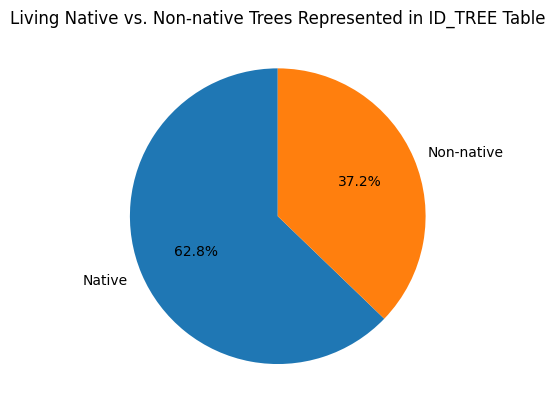

In [13]:
ax = df_trees_nativity['NATIVITY'].map({'native': 'Native', 'non-native': 'Non-native'}).value_counts().plot.pie(
    title = 'Living Native vs. Non-native Trees Represented in ID_TREE Table',
    autopct='%1.1f%%',
    startangle=90,
)
ax.set_ylabel('')
pass

Which living, native trees are represented in the `ID_TREE` table?

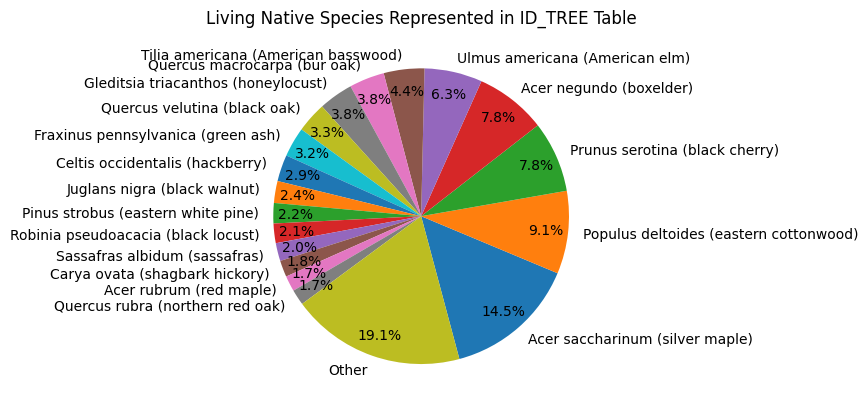

In [14]:
df = df_trees_nativity[df_trees_nativity['NATIVITY'] == 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 20  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Native Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.85,  # Determined by fiddling.
    startangle=-75,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

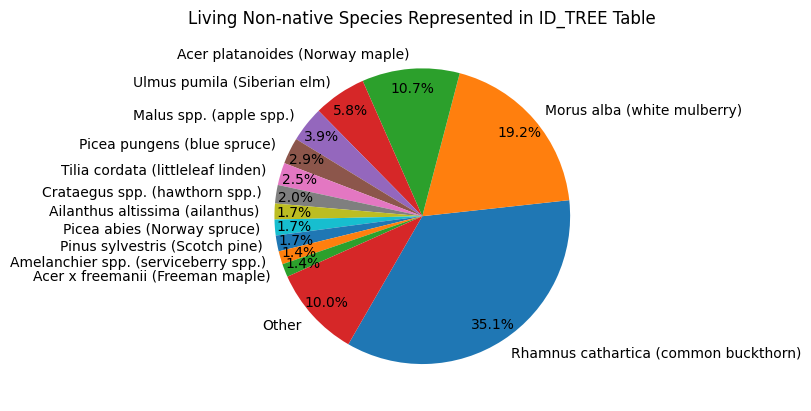

In [15]:
df = df_trees_nativity[df_trees_nativity['NATIVITY'] != 'native']

df_labeled = df['GENUS'] + ' ' + df['SPECIES'] + ' (' + df['COMMON_NAME'] + ')'
df_labeled_counts = df_labeled.value_counts()

threshold = 10  # Determined by fiddling.
df_labeled_filtered = df_labeled_counts[df_labeled_counts >= threshold]
df_labeled_others = df_labeled_counts[df_labeled_counts < threshold].sum()

df_labeled_final = df_labeled_filtered.copy()
if df_labeled_others > 0:
    df_labeled_final['Other'] = df_labeled_others

ax = df_labeled_final.plot.pie(
    title='Living Non-native Species Represented in ID_TREE Table',
    autopct='%1.1f%%',
    pctdistance=0.87,  # Determined by fiddling.
    startangle=-120,  # Determined by fiddling.
)
ax.set_ylabel('')
pass

In [16]:
# TODO - Does this differ from the lists above in any way?
df = df_id_tree[
    (df_id_tree['STATUSCD'] == TREE_STATUS_LIVE)
    &(
        (df_id_tree['TREE'] == df_id_tree['STEM'])  # Is a woodland species
        | (df_id_tree['TREE'] == df_id_tree['MOTHER_TREE'])  # Is a multi-stemmed species
    )
]
df = pd.merge(
    df[['SPCD']],
    df_ref_species[['SPCD', 'COMMON_NAME', 'GENUS', 'SPECIES']],
    left_on='SPCD',
    right_on='SPCD',
    how='left',
)
df.value_counts()

SPCD  COMMON_NAME               GENUS         SPECIES      
6918  common buckthorn          Rhamnus       cathartica       243
317   silver maple              Acer          saccharinum      170
681   white mulberry            Morus         alba             133
742   eastern cottonwood        Populus       deltoides        106
762   black cherry              Prunus        serotina          91
313   boxelder                  Acer          negundo           91
972   American elm              Ulmus         americana         74
320   Norway maple              Acer          platanoides       74
951   American basswood         Tilia         americana         52
823   bur oak                   Quercus       macrocarpa        45
552   honeylocust               Gleditsia     triacanthos       44
974   Siberian elm              Ulmus         pumila            40
837   black oak                 Quercus       velutina          39
544   green ash                 Fraxinus      pennsylvanica     38
46